In [1]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

#한글출력을 위한코드
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

#LogisticRegression, Linear SVC사용하려면 import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
################비지도학습(답x)#############

In [2]:
#주성분분석 : Cancer data

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [3]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다!!!!!
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


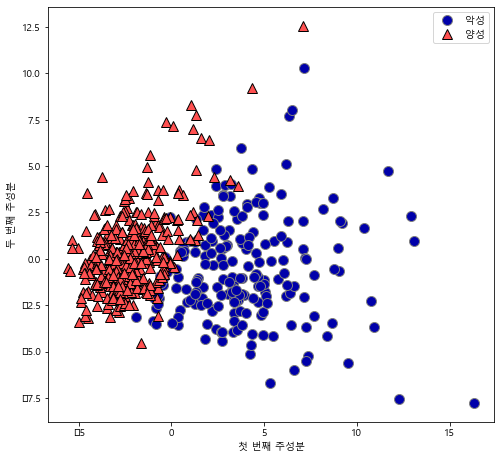

In [4]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")
plt.show() # 책에는 없음

In [ ]:
#n_component=2 , 즉 주성분2개 만으로 잘 구분하였다!

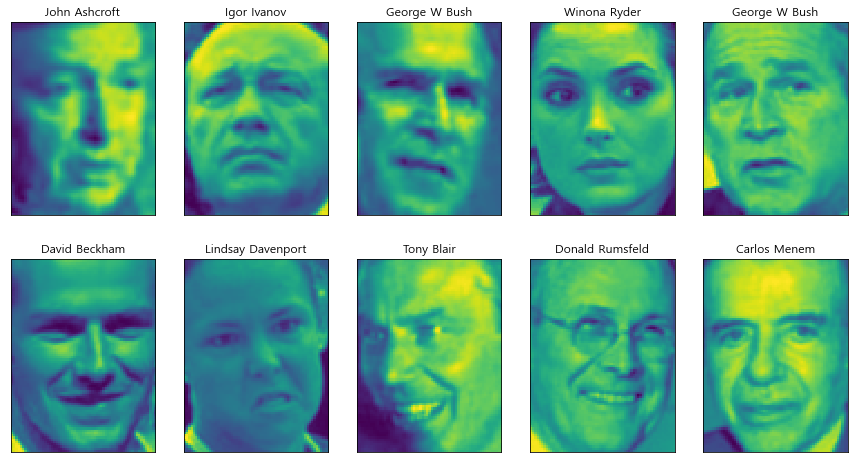

In [5]:
#얼굴인식(분류)

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [6]:
people.target[0:10], people.target_names[people.target[0:10]]

(array([28, 20, 13, 51, 13, 10, 34, 48, 11,  8], dtype=int64),
 array(['John Ashcroft', 'Igor Ivanov', 'George W Bush', 'Winona Ryder',
        'George W Bush', 'David Beckham', 'Lindsay Davenport',
        'Tony Blair', 'Donald Rumsfeld', 'Carlos Menem'], dtype='<U25'))

In [7]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

people.images.shape: (2749, 87, 65)
클래스 개수: 52


In [8]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.27


In [ ]:
#KNN으로 분류한결과 점수:0.28이다.

In [15]:
pca = PCA(n_components =100, whiten=True , random_state =0).fit(X_train)

X_train_pca = pca.transform(X_train)

print(X_train_pca.shape)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

print("X_test_pca.shape: {}".format(X_test_pca.shape))

knn = KNeighborsClassifier(n_neighbors =1)

knn.fit(X_train_pca , y_train)

print(" 테스트 세트 정확도 : {:.2f}".format(knn.score(X_test_pca , y_test)))

(1341, 100)
X_train_pca.shape: (1341, 100)
X_test_pca.shape: (448, 100)
 테스트 세트 정확도 : 0.35


In [ ]:
#PCA로 분류(component=100개)로 분류한 결과 정확도가 0.35로 상승하였다!

In [ ]:
#NMF : 뽑힌특성과 원본데이터 간의 관계파악 가능 / PCA=불가
#NMF:원본복원good / PCA:변동을 잘 나타냄

In [ ]:
#매니폴드 : 거리가까운것만으로 같은클래스인가?
#해결하기위해 새로운 평면을 찾아내는 작업

In [ ]:
#t-SNE : 데이터포인트 사이의 거리를 가장 잘 유지하는 2차원 표현을 찾는다.
#ex)숫자 잘 분류함

In [ ]:
##############clusting###################

In [ ]:
#K-means

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


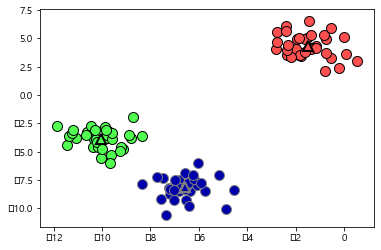

In [17]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show() 

In [ ]:
#k-means 단점 : k의 수를 설정해줘야함, k수에 따라 결과가 달라짐
#장점 : 쉽고 빠름, 대규모data에 적용가능

In [ ]:
#병합군집 : 두 군집을 병행해나가면서 군집화함 / data분석에 이용됨

In [ ]:
#DBSCAN ; (+)노이즈 포인트 구분, 클러스터개수조정필요x
#Minsample up => noise up
#Eps up => 모든 포인트가 하나의 클래스

In [ ]:
#####################군집평가###################

In [ ]:
#target값이 있는경우 : ARI=>군집평가

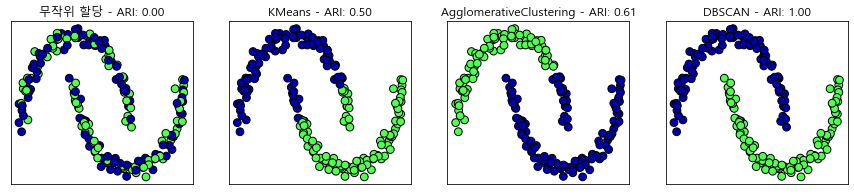

In [21]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

In [ ]:
#지도학습의 평가방법 만으로는 군집평가 불가능!
#ARI => 군집평가

In [ ]:
#target값이 없는경우 : 실루엣계수=>군집평가

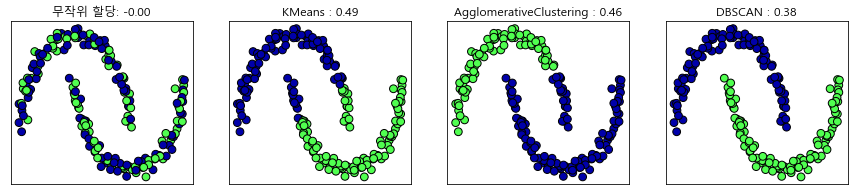

In [22]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

In [ ]:
#실루엣계수는 밀집도가 높을수록 점수가 높다

In [ ]:
#DBSCAN으로 군집수행하기

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

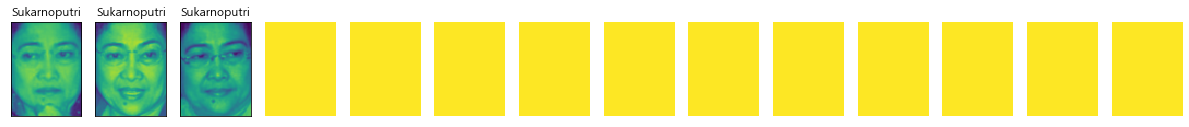

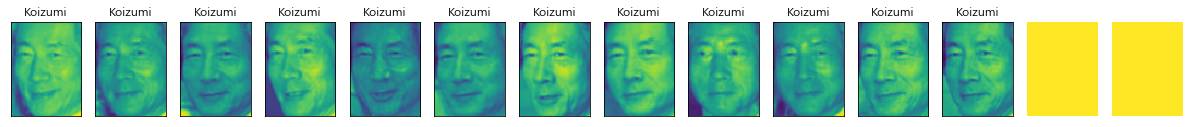

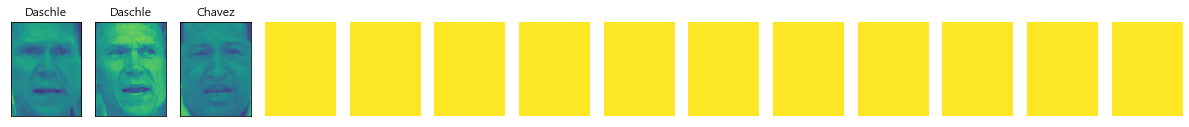

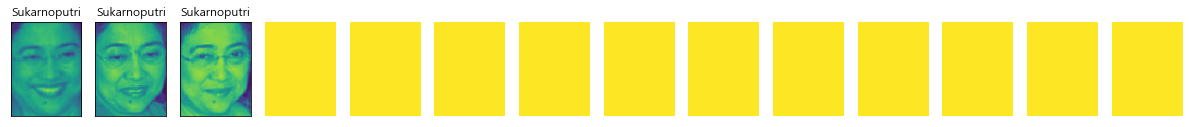

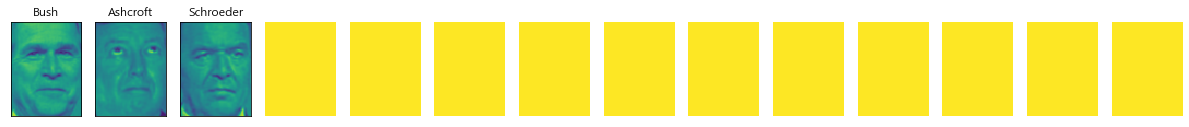

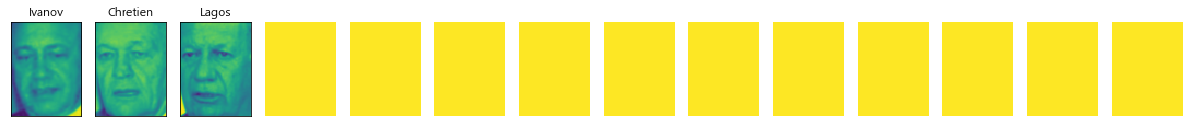

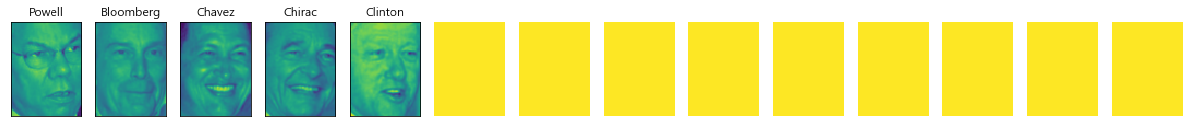

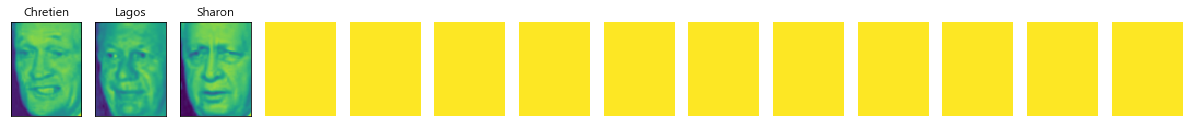

In [24]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')


In [ ]:
#K-means로 군집수행

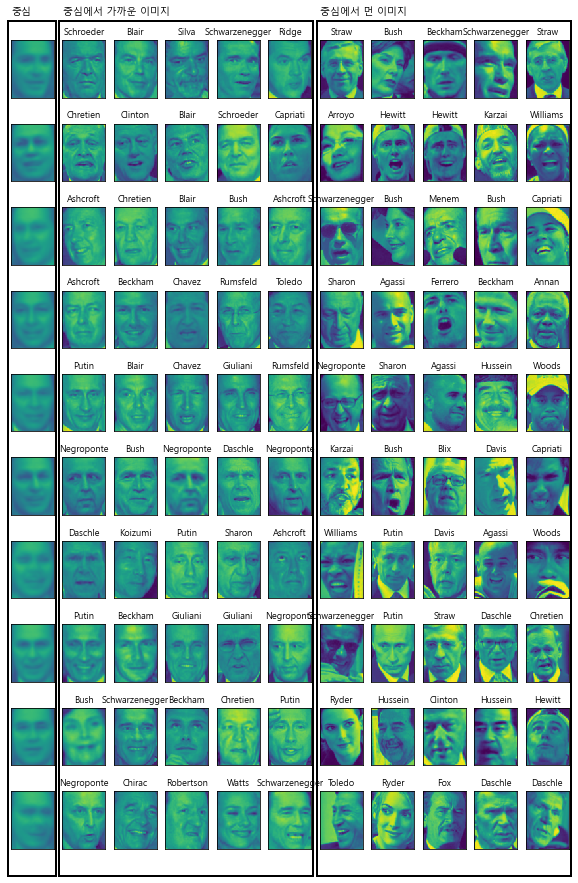

In [26]:
n_clusters = 10
# k-평균으로 클러스터를 추출합니다
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)

mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

In [ ]:
#K-means,DBSCAN,병합군집
#장점 : 이해쉬움, 대량의 데이터셋 적용가능
#K-means특징 : 클러스터개수 조정필요
#DBSAN 특징 : eps로 클러스터 크기 조절
#병합군집 : 덴더그램으로 분할 계층도 생성